Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Importing Dog Vs Cat Dataset from Kaggle

In [4]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:06<00:00, 142MB/s]
100% 812M/812M [00:06<00:00, 126MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The datset is extracted')

The datset is extracted


In [8]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The datset is extracted')

The datset is extracted


In [9]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images ', file_count)
file_names = os.listdir('/content/train')
print(file_names)

Number of images  25000
['cat.1208.jpg', 'dog.1352.jpg', 'cat.6580.jpg', 'dog.1683.jpg', 'cat.7142.jpg', 'dog.11644.jpg', 'cat.8523.jpg', 'dog.9560.jpg', 'dog.3232.jpg', 'cat.4114.jpg', 'cat.8378.jpg', 'dog.12333.jpg', 'dog.11433.jpg', 'dog.7380.jpg', 'dog.2618.jpg', 'cat.3681.jpg', 'cat.317.jpg', 'cat.10100.jpg', 'dog.803.jpg', 'dog.4792.jpg', 'dog.889.jpg', 'dog.6196.jpg', 'cat.2107.jpg', 'cat.692.jpg', 'dog.6866.jpg', 'dog.6443.jpg', 'cat.5533.jpg', 'dog.4004.jpg', 'dog.10318.jpg', 'cat.3068.jpg', 'cat.11961.jpg', 'cat.11518.jpg', 'dog.11361.jpg', 'cat.7873.jpg', 'dog.11892.jpg', 'cat.10893.jpg', 'dog.1539.jpg', 'cat.8944.jpg', 'dog.9311.jpg', 'dog.18.jpg', 'cat.9716.jpg', 'cat.8336.jpg', 'dog.7050.jpg', 'cat.11641.jpg', 'dog.1433.jpg', 'dog.5376.jpg', 'dog.7855.jpg', 'cat.10789.jpg', 'dog.964.jpg', 'dog.10258.jpg', 'dog.10617.jpg', 'cat.2152.jpg', 'dog.12072.jpg', 'dog.10107.jpg', 'dog.1904.jpg', 'dog.3320.jpg', 'dog.4532.jpg', 'cat.3759.jpg', 'dog.2996.jpg', 'cat.1049.jpg', 'dog.1

Printing the name of images

In [10]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.1208.jpg', 'dog.1352.jpg', 'cat.6580.jpg', 'dog.1683.jpg', 'cat.7142.jpg', 'dog.11644.jpg', 'cat.8523.jpg', 'dog.9560.jpg', 'dog.3232.jpg', 'cat.4114.jpg', 'cat.8378.jpg', 'dog.12333.jpg', 'dog.11433.jpg', 'dog.7380.jpg', 'dog.2618.jpg', 'cat.3681.jpg', 'cat.317.jpg', 'cat.10100.jpg', 'dog.803.jpg', 'dog.4792.jpg', 'dog.889.jpg', 'dog.6196.jpg', 'cat.2107.jpg', 'cat.692.jpg', 'dog.6866.jpg', 'dog.6443.jpg', 'cat.5533.jpg', 'dog.4004.jpg', 'dog.10318.jpg', 'cat.3068.jpg', 'cat.11961.jpg', 'cat.11518.jpg', 'dog.11361.jpg', 'cat.7873.jpg', 'dog.11892.jpg', 'cat.10893.jpg', 'dog.1539.jpg', 'cat.8944.jpg', 'dog.9311.jpg', 'dog.18.jpg', 'cat.9716.jpg', 'cat.8336.jpg', 'dog.7050.jpg', 'cat.11641.jpg', 'dog.1433.jpg', 'dog.5376.jpg', 'dog.7855.jpg', 'cat.10789.jpg', 'dog.964.jpg', 'dog.10258.jpg', 'dog.10617.jpg', 'cat.2152.jpg', 'dog.12072.jpg', 'dog.10107.jpg', 'dog.1904.jpg', 'dog.3320.jpg', 'dog.4532.jpg', 'cat.3759.jpg', 'dog.2996.jpg', 'cat.1049.jpg', 'dog.1837.jpg', 'cat.6702.jpg'

Importing the Dependencies

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

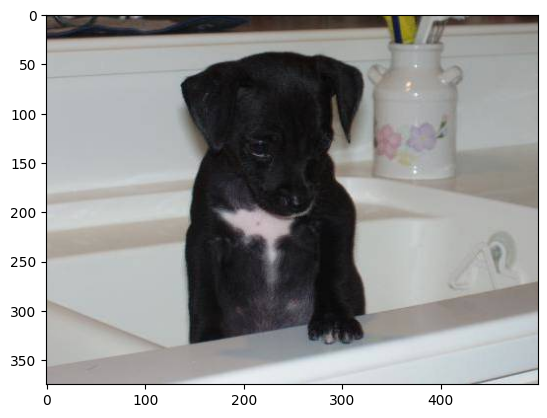

In [14]:
# diaplay dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

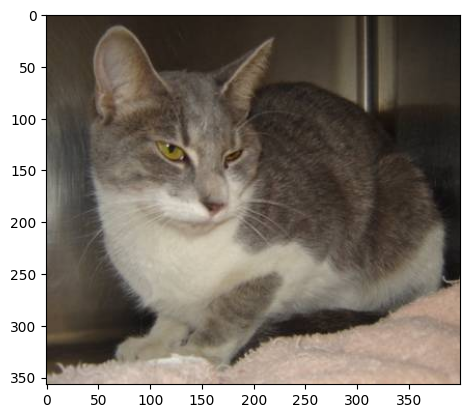

In [15]:
# diaplay cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [17]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
dog
cat
dog
cat


In [18]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images = ', dog_count)
print('Number of cat images = ', cat_count)

Number of dog images =  12500
Number of cat images =  12500


Resizing all the images

In [26]:
#creating a directory for resized images
os.mkdir('/content/image_resized')

In [27]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

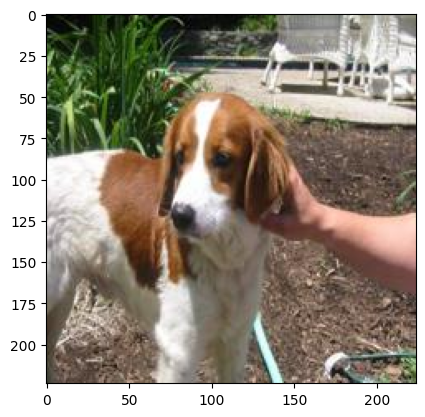

In [33]:
# diaplay resized dog image
img = mpimg.imread('/content/image_resized/dog.10039.jpg')
imgplt = plt.imshow(img)
plt.show()

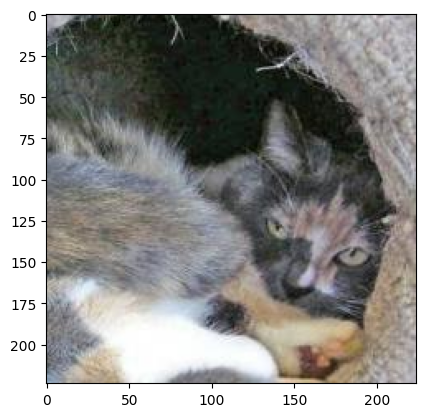

In [35]:
# diaplay resized cat image
img = mpimg.imread('/content/image_resized/cat.1003.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0
Dog --> 1

In [39]:
# creating a for loop to assign labels
filenames = os.listdir('/content/image_resized')


labels =[]

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [41]:
print(filenames[0:5])
print(len(filenames))

['cat.1208.jpg', 'dog.1352.jpg', 'cat.6580.jpg', 'dog.1683.jpg', 'cat.7142.jpg']
2000


In [42]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 1, 0]
2000


In [43]:
# counting the images of dogs and cats out og 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 985 1015]


Convertign all the resized images to numpy arrays

In [44]:
import cv2
import glob

In [45]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [46]:
print(dog_cat_images)

[[[[ 10  18  18]
   [ 10  18  18]
   [ 10  18  18]
   ...
   [  4   9   8]
   [  4   9   8]
   [  4   9   8]]

  [[ 10  18  18]
   [ 10  18  18]
   [ 10  18  18]
   ...
   [  4   9   8]
   [  4   9   8]
   [  4   9   8]]

  [[ 10  18  18]
   [ 10  18  18]
   [ 10  18  18]
   ...
   [  4   9   8]
   [  4   9   8]
   [  4   9   8]]

  ...

  [[ 94 132 144]
   [ 92 130 142]
   [ 90 128 140]
   ...
   [ 39  69  74]
   [ 38  68  73]
   [ 40  70  75]]

  [[ 90 128 140]
   [ 89 127 139]
   [ 89 127 139]
   ...
   [ 37  69  74]
   [ 37  69  74]
   [ 41  73  78]]

  [[ 82 120 132]
   [ 84 122 134]
   [ 87 125 137]
   ...
   [ 39  71  76]
   [ 42  74  79]
   [ 48  80  85]]]


 [[[ 11   7  43]
   [ 12   8  44]
   [ 11   7  43]
   ...
   [119 100  85]
   [118  99  84]
   [118  99  84]]

  [[ 10   6  42]
   [ 12   8  44]
   [ 11   7  43]
   ...
   [119 100  85]
   [119 100  85]
   [119 100  85]]

  [[ 10   6  42]
   [ 12   8  44]
   [ 10   6  42]
   ...
   [119 100  85]
   [119 100  85]
   [119 100

In [47]:
type(dog_cat_images)

numpy.ndarray

In [48]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [49]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -->training images
400 -->test images

In [52]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [53]:
print(X_train_scaled)

[[[[0.79215686 0.7254902  0.69019608]
   [0.78823529 0.72156863 0.68627451]
   [0.78431373 0.72156863 0.6745098 ]
   ...
   [0.4        0.36862745 0.34117647]
   [0.40784314 0.37647059 0.34901961]
   [0.42745098 0.39607843 0.36862745]]

  [[0.79607843 0.72941176 0.69411765]
   [0.79215686 0.7254902  0.69019608]
   [0.78431373 0.72156863 0.6745098 ]
   ...
   [0.4        0.36862745 0.34117647]
   [0.40784314 0.37647059 0.34901961]
   [0.42352941 0.39215686 0.36470588]]

  [[0.8        0.73333333 0.69803922]
   [0.79607843 0.72941176 0.69411765]
   [0.78823529 0.7254902  0.67843137]
   ...
   [0.40392157 0.37254902 0.34509804]
   [0.40784314 0.37647059 0.34901961]
   [0.41960784 0.38823529 0.36078431]]

  ...

  [[0.93333333 0.95294118 0.94509804]
   [0.93333333 0.95294118 0.94509804]
   [0.93333333 0.95294118 0.94509804]
   ...
   [0.8627451  0.87058824 0.87058824]
   [0.82352941 0.83137255 0.83137255]
   [0.81960784 0.82745098 0.82745098]]

  [[0.93333333 0.95294118 0.94509804]
   [0.9

**Building the Neural Network**

In [54]:
import tensorflow as tf
import tensorflow_hub as hub

In [55]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [56]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [57]:
model.compile(

              optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['acc']


)

In [58]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 53s 952ms/step - loss: 0.2380 - acc: 0.9000
Epoch 2/5
50/50 [==============================] - 50s 1s/step - loss: 0.0873 - acc: 0.9706
Epoch 3/5
50/50 [==============================] - 49s 979ms/step - loss: 0.0649 - acc: 0.9781
Epoch 4/5
50/50 [==============================] - 48s 960ms/step - loss: 0.0526 - acc: 0.9825
Epoch 5/5
50/50 [==============================] - 50s 989ms/step - loss: 0.0432 - acc: 0.9869


In [59]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss = ', score)
print('Test Accuracy = ', acc)

13/13 [==============================] - 13s 937ms/step - loss: 0.0545 - acc: 0.9825
Test Loss =  0.05449940264225006
Test Accuracy =  0.9825000166893005


**Predictive System**

Path of the image to be predicted: /content/dog.jpg


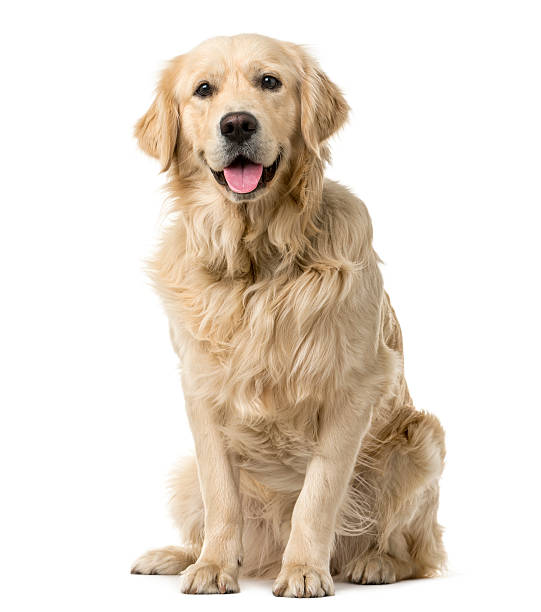

1/1 [==============================] - 0s 56ms/step
[[-3.316096   3.3782876]]
1
The image represents a dog


In [80]:
import cv2
import numpy as np

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

# Resize the image to match the expected input shape of your model
input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize / 255

image_reshaped = np.reshape(input_image_scaled, (1, 224, 224, 3))

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a cat')
else:
  print('The image represents a dog')




Path of the image to be predicted: /content/image_resized/cat.1003.jpg


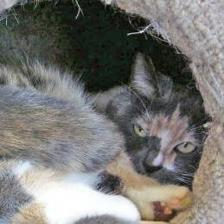

1/1 [==============================] - 0s 52ms/step
[[ 2.5710511 -3.3658376]]
0
The image represents a cat


In [81]:
import cv2
import numpy as np

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

# Resize the image to match the expected input shape of your model
input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize / 255

image_reshaped = np.reshape(input_image_scaled, (1, 224, 224, 3))

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a cat')
else:
  print('The image represents a dog')